# Good and Bas Cholesterol (p229)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Authors: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

**This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 7 page 229**

## Randomised Controlled Trials with noncompliance

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb
import pyagrum.causal as csl
import pyagrum.causal.notebook as cslnb

> Noncompliance is an important issue in the conduct of randomized controlled trials (RCTs). Taking account for noncompliers is necessary because they will bias the impact of the treatment on the outcome. 

**We create the causal diagram:**

From 1973 to 1984 a randomized controlled trial was conducted to measure the effect of cholestyramine on cholesterol. The researchers in charge of this trial faced the noncompliance problem. (when patients who participate in the trial don't take their treatment). The corresponding causal diagram is the following:

In [2]:
bw = gum.fastBN("Assigned->Received->Cholesterol")
bw

(pyagrum.BayesNet@0x126a5c000) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 5, mem: 80o}

All our variables are binary, not numerical.

## What is the effect of the treatment on the outcome?

> This question raises another one: <b> What if noncompliers followed the instructions they were given, how would they have responded to the treatment? </b> We can't suppose that they would respond the same way compliers did. Not complying is maybe due to the risk of interacting with other drugs which can be a sign of a disease, and therefore these noncompliers may react differently: confounding.

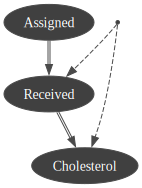

In [3]:
bwModele = csl.CausalModel(bw, [("confounder", ["Received", "Cholesterol"])], True)
gnb.show(bwModele)

In [4]:
cslnb.showCausalImpact(bwModele, on="Cholesterol", doing="Received")

> We cannot observe any of these confounders, so we can't control for it using back-door adjustment.<br>
"Assigned" is an "instrumental variable" :
+ According to data the variable "Assigned" is correlated with the outcome "Cholesterol"
+ The variable "Assigned" has not a causal effect on the outcome: Assigning a number doesn't cause cholesterol.
+ The instrument has a causal effect on the treatment "Received"
+ The variable "Assigned" is as if it was randomly assigned. (no incoming arrows in the causal diagram)
+ The correlation between "Assigned" and "Received" that is observed in the data, is the causal effect of the instrument over the treatment.
+ Since the instrument is as if it was randomly assigned (no incoming arrows), it can't be correlated with any other confounders of the relationship between it and the outcome.

> One of the methods of taking account for noncompliers is to take the worst-case scenario where none of the noncompliers would have improved if they followed the instructions (we get that 39.2% improved.), and the best-case scenario where all noncompliers would have improved if they had complied (we get that 78.0% improved.), we can say that the treatment is efficient because even in the worst-case scenario 39.2% of the population improved. 